In [9]:
## We will perform Analysis of each table of raw data downloaded from https://clinicalcommons.ccdi.cancer.gov/explore
# Download date: 05/31/2024


In [2]:
## 1. Participant data or Demograpics

Unique Diagnoses Count: 271
Participant Count: 6623


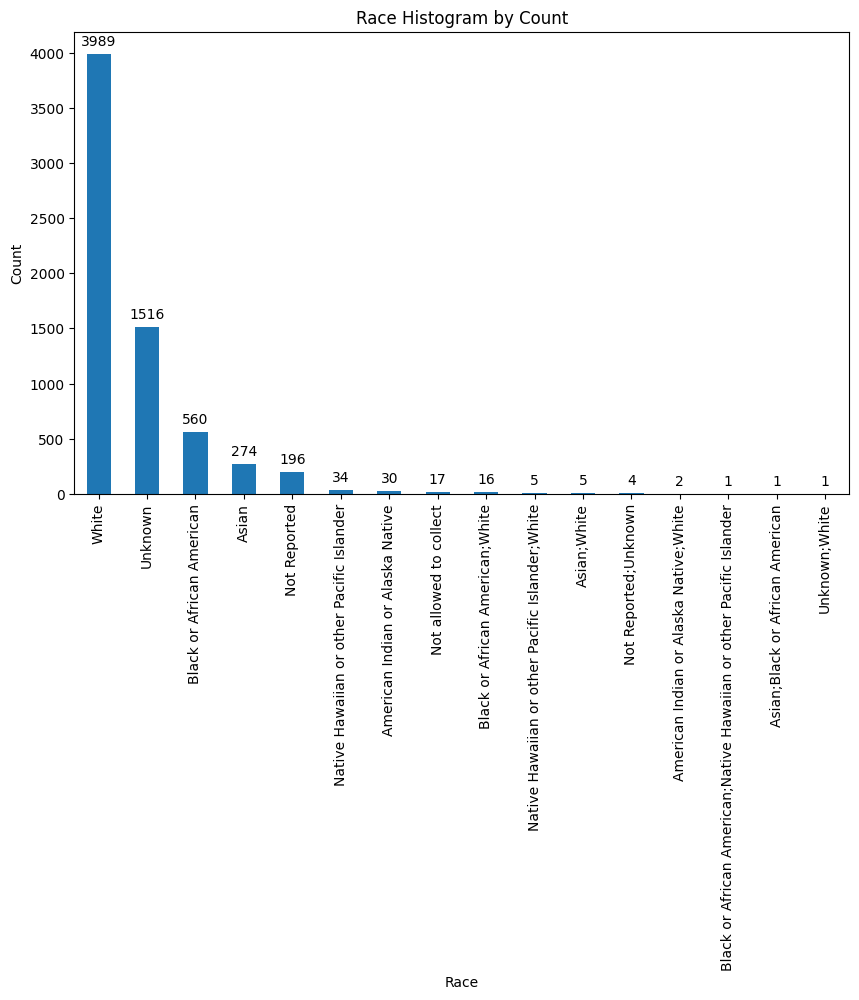

In [5]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
file_path_diagnoses = 'Diagnosis.csv'
file_path_participants = 'Participants.csv'


diagnoses_data = pd.read_csv(file_path_diagnoses)
participants_data = pd.read_csv(file_path_participants)

# Unique Diagnoses Count
unique_diagnoses_count = diagnoses_data['Diagnosis'].nunique()
print(f"Unique Diagnoses Count: {unique_diagnoses_count}")

# Participant Count
participant_count = participants_data['Participant Id'].nunique()
print(f"Participant Count: {participant_count}")

def plot_histogram_with_counts(data, column, title, xlabel):
    plt.figure(figsize=(10, 6))
    ax = data[column].value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    
    # Add counts on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    
    plt.show()

# Race Histogram
plot_histogram_with_counts(participants_data, 'Race', 'Race Histogram by Count', 'Race')


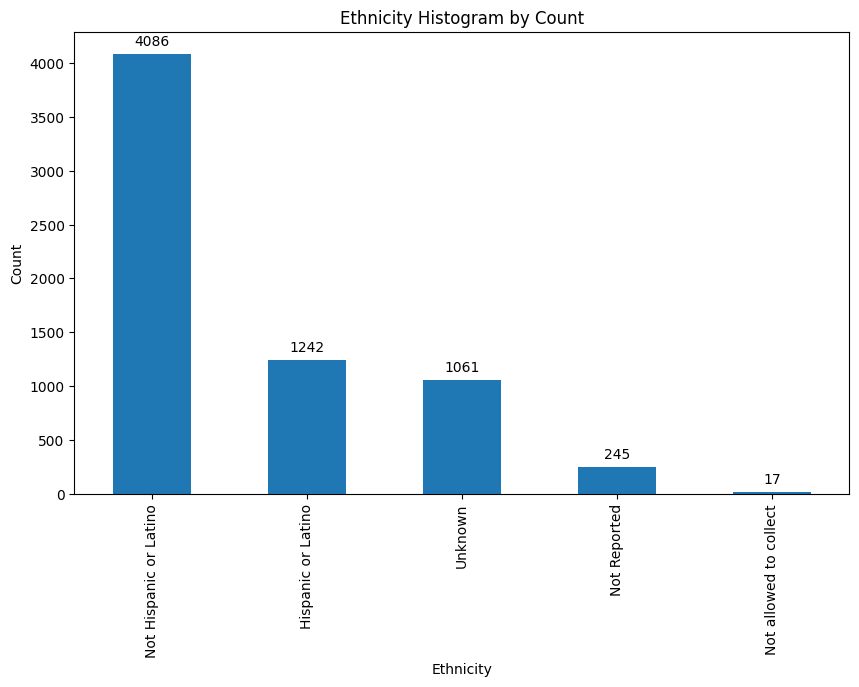

In [6]:

# Ethnicity Histogram
plot_histogram_with_counts(participants_data, 'Ethnicity', 'Ethnicity Histogram by Count', 'Ethnicity')


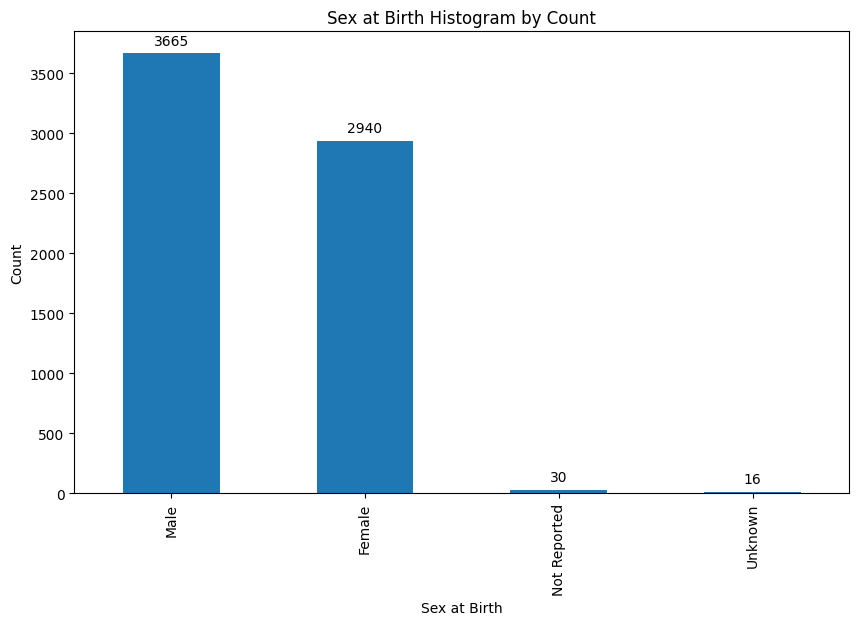

In [7]:

# Sex at Birth Histogram
plot_histogram_with_counts(participants_data, 'Sex at Birth', 'Sex at Birth Histogram by Count', 'Sex at Birth')


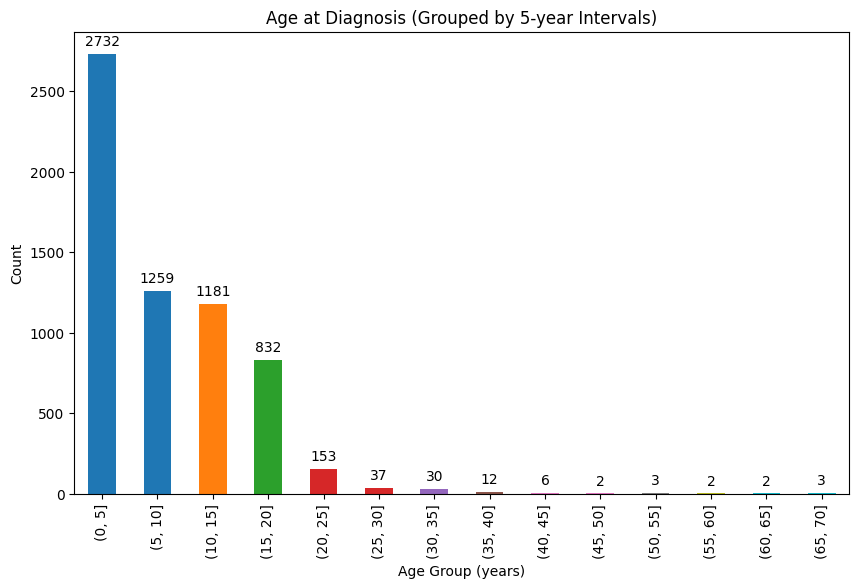

In [13]:
import numpy as np
# Convert Age at Diagnosis from days to numeric, forcing errors to NaN
diagnoses_data['Age at Diagnosis (days)'] = pd.to_numeric(diagnoses_data['Age at Diagnosis (days)'], errors='coerce')

# Drop rows with NaN values in the Age column (if any exist)
diagnoses_data = diagnoses_data.dropna(subset=['Age at Diagnosis (days)'])

# Convert Age at Diagnosis from days to years
diagnoses_data['Age at Diagnosis (years)'] = diagnoses_data['Age at Diagnosis (days)'] / 365.25

# Group Age at Diagnosis into 5-year intervals
bins = range(0, int(diagnoses_data['Age at Diagnosis (years)'].max()) + 5, 5)
diagnoses_data['Age Group'] = pd.cut(diagnoses_data['Age at Diagnosis (years)'], bins=bins)

# Create color map
colors = plt.cm.tab10(np.linspace(0, 1, diagnoses_data['Age Group'].nunique()))

# Plot Age Group Histogram with different colors
plt.figure(figsize=(10, 6))
ax = diagnoses_data['Age Group'].value_counts(sort=False).plot(kind='bar', color=colors)
plt.title('Age at Diagnosis (Grouped by 5-year Intervals)')
plt.xlabel('Age Group (years)')
plt.ylabel('Count')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

In [17]:
# Data curation and extracting insights by joing various datasets.
#The Diagnosis and Participants datasets share the Participant Id column, so they can be merged directly on this column.
#The Survival dataset also has the Participant Id column, allowing it to be merged with the combined dataset from the first merge.
#The Studies dataset does not have Participant Id but can be merged using the Study ID column, which is present in all datasets.

In [16]:
import pandas as pd

# Load the datasets
diagnosis_df = pd.read_csv('Diagnosis.csv')
participants_df = pd.read_csv('Participants.csv')
studies_df = pd.read_csv('Studies.csv')
survival_df = pd.read_csv('Survival.csv')
# Survival and Diagnosis are two important tables, Participants table provides Demographics data, Studies table provides studies.

# Step 1: Merge Diagnosis and Participants on 'Participant Id'
combined_df = survival_df.merge(diagnosis_df, on='Participant Id', how='inner')
# Count the number of unique participants in the merged dataset
participant_count = combined_df['Participant Id'].nunique()
# Display the results
print(f'Number of unique participants: {participant_count}')




Number of unique participants: 4797


In [17]:
# Step 2: Merge the result with Survival on 'Participant Id'
combined_df = combined_df.merge(participants_df, on='Participant Id', how='inner')
# Count the number of unique participants in the merged dataset
participant_count = combined_df['Participant Id'].nunique()
# Display the results
print(f'Number of unique participants: {participant_count}')


Number of unique participants: 4797


In [18]:
# Step 3: Merge the result with Studies on 'Study ID'
combined_df = combined_df.merge(studies_df, on='Study ID', how='outer')
# Count the number of unique participants in the merged dataset
participant_count = combined_df['Participant Id'].nunique()
# Display the results
print(f'Number of unique participants: {participant_count}')
# Generate descriptive statistics for the combined dataset
#stats = combined_df.describe(include='all')
#print(stats)

Number of unique participants: 4797


In [19]:
# Clean the 'Diagnosis' and 'Anatomic Site' columns by removing codes and colons
combined_df['Diagnosis'] = combined_df['Diagnosis'].str.split(':').str[-1].str.strip()
combined_df['Anatomic Site'] = combined_df['Anatomic Site'].str.split(':').str[-1].str.strip()

# Identify and drop columns that resulted from merging and have suffixes like '_x' or '_y'
columns_to_drop = [col for col in combined_df.columns if '_x' in col or '_y' in col]
combined_df_cleaned = combined_df.drop(columns=columns_to_drop)

# Count the number of unique participants in the final cleaned dataset
final_cleaned_participant_count = combined_df_cleaned['Participant Id'].nunique()

# Generate descriptive statistics for the final cleaned dataset
final_cleaned_stats = combined_df_cleaned.describe(include='all')


# Display the results
print(f'Number of unique participants: {final_cleaned_participant_count}')
#print(final_cleaned_stats)

Number of unique participants: 4797


In [20]:
# Save the combined dataset
combined_df_cleaned.to_csv('combined_df_cleaned.csv', index=False)
combined_df_cleaned.head()
# Count the number of unique participants in the final cleaned dataset
final_cleaned_participant_count = combined_df_cleaned['Participant Id'].nunique()
# Display the results
print(f'Number of unique participants: {final_cleaned_participant_count}')

Number of unique participants: 4797


In [21]:
# Missing Data in Critical Columns:

# Participant Id: 4 rows had NaN values.
# Study ID: 1,984 rows had NaN values.
# Diagnosis: 223 rows had NaN values.
# Age at Diagnosis (days): 474 rows had NaN values.
# Total Rows:

# Before Dropping NaNs: The dataset had 6,814 rows.
# After Dropping NaNs: The dataset was reduced to 4,637 rows.
# Explanation:
# A significant number of rows were dropped due to missing values, particularly in the Study ID and Age at Diagnosis (days) columns. This explains why the number of unique participants decreased to 4,608.


In [66]:
# Data further cleaned to drop rows with blanks and nan and unknown data in key columns through visual inspections

In [22]:
import pandas as pd
combined_df_cleaned_v2 = pd.read_csv('combined_df_cleaned.csv')


In [61]:
#Remove unwated columns

In [23]:
combined_df_cleaned.columns.to_list()

['Participant Id',
 'Survival ID',
 'Last Known Survival Status',
 'Age at Last Known Survival Status',
 'Event-Free Survival Status',
 'Age at Event-Free Survival Status',
 'First Event',
 'Diagnosis ID',
 'Diagnosis',
 'Diagnosis Classification System',
 'Diagnosis Basis',
 'Diagnosis Comment',
 'Disease Phase',
 'Tumor Classification',
 'Anatomic Site',
 'Age at Diagnosis (days)',
 'Toronto Childhood Cancer Staging',
 'Tumor Grade',
 'Tumor Stage Clinical T',
 'Tumor Stage Clinical N',
 'Tumor Stage Clinical M',
 'Race',
 'Ethnicity',
 'Sex at Birth',
 'Study ID',
 'Study Accession',
 'ACL',
 'Study Short Title',
 'Acronym',
 'Study Description',
 'Consent',
 'Consent Number',
 'External URL']

In [25]:
#remove columns
import pandas as pd

# Load your data (replace 'data_cleaned.csv' with your actual file name)
data = pd.read_csv('combined_df_cleaned.csv')

# List of columns to keep as per the image
columns_to_keep = [
    'Participant Id', 
    'Race', 
    'Ethnicity', 
    'Sex at Birth', 
    'Diagnosis', 
    'Anatomic Site', 
    'Age at Diagnosis (days)', 
    'Last Known Survival Status', 
    'Age at Last Known Survival Status', 
    'Event-Free Survival Status', 
    'Study Short Title'
]

# Keep only these columns and drop all others
data = data[columns_to_keep]


# Save the updated DataFrame if needed
data.to_csv('data_with_primary_key.csv', index=False)


In [30]:

# Load your data (replace 'data_with_primary_key.csv' with your actual file name)
data = pd.read_csv('data_with_primary_key.csv')

# Drop rows where 'Participant Id' is null
data = data.dropna(subset=['Participant Id'])

# Drop duplicate rows based on 'Participant Id'
data = data.drop_duplicates(subset=['Participant Id'], keep=False)
# Drop rows where 'Age at Diagnosis (days)' is 'Not Reported'
data = data[data['Age at Diagnosis (days)'] != 'Not Reported']

# Optionally, display the first few rows to verify
data.head()

,Participant Id,Race,Ethnicity,Sex at Birth,Diagnosis,Anatomic Site,Age at Diagnosis (days),Last Known Survival Status,Age at Last Known Survival Status,Event-Free Survival Status,Study Short Title
0,104,Unknown,Hispanic or Latino,Male,"Synovial sarcoma, NOS","Connective, subcutaneous and other soft tissue...",5840,Alive,9079.0,Not Reported,Genomic Analysis in Pediatric Malignancies
1,106,Unknown,Not Hispanic or Latino,Female,Chondroblastic osteosarcoma,Long bones of lower limb and associated joints,5110,Dead,7253.0,Not Reported,Genomic Analysis in Pediatric Malignancies
2,107,White,Not Hispanic or Latino,Female,"Osteosarcoma, NOS",Long bones of lower limb and associated joints,6205,Alive,8787.0,Not Reported,Genomic Analysis in Pediatric Malignancies
3,128,White,Not Hispanic or Latino,Female,"Osteosarcoma, NOS","Lung, NOS",3650,Dead,4030.0,Not Reported,Genomic Analysis in Pediatric Malignancies
4,152,Black or African American,Not Hispanic or Latino,Female,"Osteosarcoma, NOS",Long bones of lower limb and associated joints,4015,Dead,4526.0,Not Reported,Genomic Analysis in Pediatric Malignancies


In [31]:
final_cleaned_participant_count = data['Participant Id'].nunique()
# Display the results
print(f'Number of unique participants: {final_cleaned_participant_count}')

Number of unique participants: 4592


In [32]:
# Save the updated DataFrame if needed
data.to_csv('data_with_primary_key.csv', index=False)

### Unique Paticipants
The Participant count in participant table is 6623 but other tables(Diagnosis and Survival) don't have some of the relevant data for some participants
so when we join all the tables we get 4797 participants. After removing duplicates, null values and other cleaning process We get 4592 participants. 
As this data is low, we use GenAI techniques to generate some synthetic data. Combined data is used for training and testing.